# We Rate Dogs - Data Wrangling Project

## Table of contents
- [Introduction](#intro)
- [Gathering](#gather)
- [Assesing](#assess)
- [Cleaning](#clean)
- [Analysing](#analyse)

<a id="intro"></a>
## Introduction

**Introduction to df1**

df1 gives information about  a dog name, rating ,stage and the source of data. All these information are extracted from a text under the image.

**Introduction to df2**

df2 gives the images of dog and its breed (based on the deep learning algorithm)
 
**Introduction to df3**

df3 is fetched from twitter. It contains actual favorite and retweets counts.


<a id="gather"></a>
## Gathering

In [115]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
#Gathering data
import requests
import tweepy
#Plots
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
#Display images
#from PIL import Image
import urllib.request
from IPython.display import Image
import matplotlib.image as mpimg
from matplotlib.pyplot import figure


Import files to dataframes:

In [116]:
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [117]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
#Save response content as image_prediction file
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
#load image_prediction as dataframe with delimiter \t    
df2=pd.read_csv('image_prediction.tsv',delimiter='\t')

In [118]:
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Tweets favorite and retweet count we fetched from Twitter api to the dataframe df3. First connect with API using tweepy modul.

In [119]:
#like and retweet counts- gather from Twitter API 
#Keys are blank after fetching the data to file for security reasons

#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Try
#first=api.get_status(df1.tweet_id[0],tweet_mode='extended')#retweet_count=7247, favorite_count=34703,
#first.favorite_count

Write the retweet and favorite counts for each tweet_id of the df1 to the file tweet_json.txt.

In [7]:
#txt_file=open('tweet_json.txt','w')
#txt_file.write('tweet_id retweet_count favorite_count''\n')
##
#ID_not_find=[]
#i=0
#for tweet_id in df1.tweet_id:
#    try:   
#        tweet_info=api.get_status(tweet_id,tweet_mode='extended')
#        retweet_count=tweet_info.retweet_count
#        favorite_count=tweet_info.favorite_count
        
        #print(str(i)+' ' +str(tweet_id)+ ' ' +str(retweet_count)+ ' ' +str(favorite_count))
        #txt_file.write(str(tweet_id)+' '+str(retweet_count)+' '+str(favorite_count))  
#        i=i+1
#    except:  +'\n'
#        ID_not_find.append(i)
#        i=i+1
#        pass
#txt_file.close()



These are ids of missing tweets from df1. All missing tweets_ids are caught in the file N

In [8]:
No_ID=[19,94,99,101,114,127,149,175,203,238,243,249,284,285,349,367,490,549,732,765,795,797,868,909,1702]

Reading file tweet_json.txt to DataFrame df3

In [9]:
df3=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r') as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        df3=df3.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
df3=df3.iloc[1:,:]
df3['tweet_id']=df3["tweet_id"].astype('int64')

<a id="assess"></a>
## Assesing

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df1.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [12]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df1['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Buddy          7
Daisy          7
Bailey         7
Scout          6
Dave           6
Milo           6
Oscar          6
Leo            6
Koda           6
Jax            6
Jack           6
Bella          6
Rusty          6
Stanley        6
Louis          5
            ... 
Scruffers      1
Grey           1
Sephie         1
Glenn          1
Chubbs         1
Kona           1
Daniel         1
Cora           1
Marty          1
Mark           1
Mary           1
Chevy          1
Lucia          1
Geoff          1
Claude         1
Bert           1
Benny          1
Schnitzel      1
Danny          1
Tobi           1
Marq           1
Milky          1
Roscoe         1
Cal            1
Monkey         1
Bilbo          1
Kayla          1
Rumble        

In [14]:
df1['tweet_id'].duplicated().any()==True

False

In [15]:
df1['rating_numerator'].max()

1776

In [16]:
df1['rating_numerator'].min()

0

In [17]:
df1[df1['rating_numerator']==df1['rating_numerator'].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [18]:
df1[df1['rating_numerator']==df1['rating_numerator'].min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [19]:
df1.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
df1[df1['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
df1[df1['expanded_urls'].isnull()].count()

tweet_id                      59
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     59
source                        59
text                          59
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                  0
rating_numerator              59
rating_denominator            59
name                          59
doggo                         59
floofer                       59
pupper                        59
puppo                         59
dtype: int64

In [22]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
df1[(df1['rating_numerator']<10) & (df1['expanded_urls'].isnull()==False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
764,777953400541634568,NaN,NaN,2016-09-19 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Gerald. He's a fairly exot...,7.681934e+17,4.196984e+09,2016-08-23 21:09:14 +0000,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None


In [24]:
# df2 will give me the images of dog and breed based on algorithm

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df2.isnull().values.any()

False

In [27]:
df2['tweet_id'].duplicated().any()==True

False

In [28]:
df2.p1_conf.max()

1.0

In [29]:
df2.p2_conf.max()

0.48801400000000011

In [30]:
df2[df2.p2_conf==df2.p2_conf.max()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False


In [31]:
urllib.request.urlretrieve('https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg', "p2_highest.jpg")

('p2_highest.jpg', <http.client.HTTPMessage at 0x7f296972bf98>)

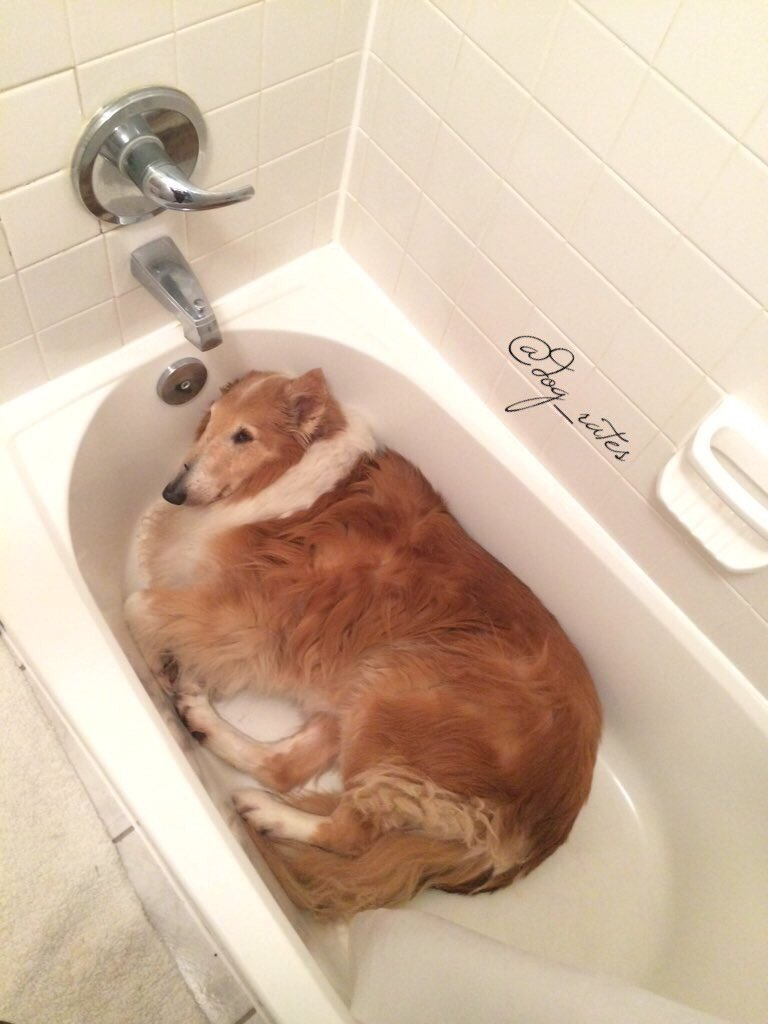

In [32]:
Image(filename="p2_highest.jpg")

In [33]:
df2.p1_conf.min()

0.044333400000000002

In [34]:
df2[df2.p1_conf==df2.p1_conf.min()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True


In [35]:
urllib.request.urlretrieve('https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg', "p1_lowest.jpg")

('p1_lowest.jpg', <http.client.HTTPMessage at 0x7f296945a048>)

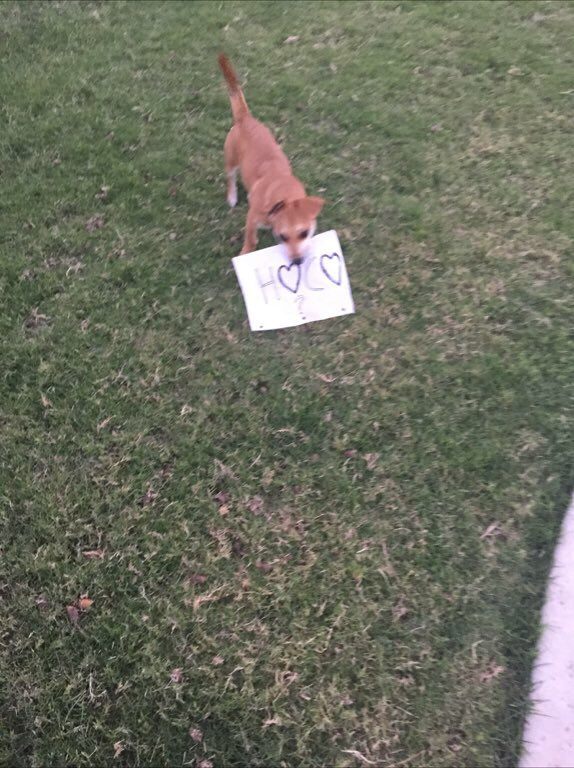

In [36]:
#img = Image.open("p1_low.jpg")
Image(filename="p1_lowest.jpg")

In [37]:
df2[df2['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [38]:
df2[df2['p1_dog']==False & (df2['p2_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [39]:
df2[df2['p1_dog']==False & (df2['p2_dog']==False)&(df2['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 1 to 2331
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: int64(1), object(2)
memory usage: 54.7+ KB


In [41]:
df3.head(3)

,tweet_id,retweet_count,favorite_count
1,892420643555336193,7247,34703
2,892177421306343426,5429,30065
3,891815181378084864,3583,22629


In [42]:
df3['tweet_id'].duplicated().any()==True

False

In [43]:
df3['retweet_count'].value_counts()

502      5
494      5
198      5
916      5
348      4
492      4
211      4
1634     4
115      4
392      4
695      4
1185     4
476      4
138      4
652      4
189      4
1078     4
5338     4
893      4
88       4
523      4
908      4
1856     4
381      4
519      4
581      4
80       4
171      4
210      3
262      3
        ..
1268     1
21       1
27       1
2519     1
3096     1
484      1
1198     1
483      1
2893     1
1045     1
866      1
1581     1
289      1
809      1
113      1
3444     1
3129     1
178      1
10175    1
3017     1
1306     1
2422     1
1083     1
688      1
255      1
268      1
1670     1
7277     1
6520     1
8091     1
Name: retweet_count, Length: 1664, dtype: int64

In [44]:
df3['favorite_count'].value_counts()

0        163
2049       3
2518       3
743        3
1094       3
2942       3
1501       3
3171       3
2373       3
2697       3
1016       3
467        3
221        3
445        3
312        3
4104       3
807        3
2894       3
1855       3
23495      2
10315      2
398        2
2929       2
2116       2
3661       2
2097       2
3249       2
3131       2
459        2
3044       2
        ... 
20194      1
5625       1
2941       1
3591       1
2300       1
15822      1
1641       1
31029      1
2157       1
9602       1
12273      1
3338       1
4011       1
7896       1
200        1
3307       1
634        1
119        1
801        1
724        1
20423      1
22923      1
170        1
40317      1
3398       1
2658       1
3607       1
1852       1
19193      1
8470       1
Name: favorite_count, Length: 1978, dtype: int64

In [45]:
df3[df3['retweet_count'].str.isnumeric()==False]

,tweet_id,retweet_count,favorite_count


In [46]:
df3[df3['favorite_count'].str.isnumeric()==False]

,tweet_id,retweet_count,favorite_count


In [47]:
df3.head(2)

,tweet_id,retweet_count,favorite_count
1,892420643555336193,7247,34703
2,892177421306343426,5429,30065


In [48]:
df3['retweet_count'].max()

'9997'

In [49]:
df3['retweet_count'].min()

'1'

In [50]:
len(df3)

2331

In [51]:
df2['tweet_id'].isin(df3['tweet_id']).value_counts()

True     2059
False      16
Name: tweet_id, dtype: int64

In [52]:
df2['tweet_id'].isin(df1['tweet_id']).value_counts()

True    2075
Name: tweet_id, dtype: int64

In [53]:
df3['tweet_id'].isin(df1['tweet_id']).value_counts()

True    2331
Name: tweet_id, dtype: int64

In [54]:
len(df1)

2356

In [55]:
common = df1.merge(df2,on=['tweet_id'])
common1=df1.merge(df3,on=['tweet_id'])

In [56]:
df1[(~df1.tweet_id.isin(common.tweet_id))&(~df1.tweet_id.isin(common1.tweet_id))].count()

tweet_id                      9
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     9
source                        9
text                          9
retweeted_status_id           9
retweeted_status_user_id      9
retweeted_status_timestamp    9
expanded_urls                 9
rating_numerator              9
rating_denominator            9
name                          9
doggo                         9
floofer                       9
pupper                        9
puppo                         9
dtype: int64

In [57]:
df1[(~df1.tweet_id.isin(common.tweet_id))&(~df1.tweet_id.isin(common1.tweet_id))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
506,812747805718642688,NaN,NaN,2016-12-24 19:52:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sammy. At first I was like...,6.800555e+17,4.196984e+09,2015-12-24 16:00:30 +0000,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a doggo blowing bubbles....,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None


### Tidiness issues

#### Messy data

<ol>
 <li>In df1: Dog category should be 1 column instead of 4.
    Rearrange columns in the table</li>   
 <li>Merge df1 with df3 (retweet and favorite count) and with df2(images and breed predictions) - so we will have all data in one place for analysis, even if we loose some data as a whole. </li> 
    
</ol>    

### Quality issues
#### Dirty data

<ol>
 <li>We only want ratings with images. Missing values in df2: 2075 ids have images, but in df1 we have 2356.</li> 
    <li> Missing values in df3: 2075 ids have images, but in df1 we have 2356.</li>
    <li>Too many columns in df1, only some are needed for this project. Missing data for reply_to_user_id/retweeted_status_user_id (NaN)</li> 
    <li>In df1, rows with null expanded_urls are actually not tweets with  dog pictures. They are typically replies from "WeRateDogs" to the followers.So we have actually 2297 valid tweets. </li>
    <li>In df1 some ratings are wrong. F.e. https://twitter.com/dog_rates/status/666287406224695296 should be 9/10 instead of 1/2. Special ratings have typically photos with lot of dogs/puppies on the photo. Ratings with low numerator ($<7$) are usually just for fun and a tweet has no picture of dogs in it or it is a rating with last digits in float.Mistakes are made by some additional numbers  in the text (except of ratings). </li>
    <li>Tweets with numerator=0 are not valid.</li>
<li> In df1, erroneous datatype for timestamp. It is object (string) instead of datetime.</li>
    <li>In df1, missing data represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.</li>
  <li>In df1, some dog names are not correct.</li>
  <li>Some of the tweets are just</li>
  <li>In df2, 543 predictions are not dogs and so with variables p1_dog&p2_dog&p3_dog equal False, f.e. tweet_id 707693576495472641 (I would guess it is a collie). It needs human insight to identify breeds in these cases - which is not a part of this project. 

  </li>
  <li>In df3, erroneous type for favorite and retweet counts. It is object (string) but it should be integer, since we need it later for rating. 
    </li>
</ol>
    

## Cleaning

In [58]:
#first make copies
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

**1. Issue**

Too many columns in df1 which are not needed

**Define**

Remove abundant columns

**Code**

In [59]:
df1_clean=df1_clean[['tweet_id','timestamp','name','doggo','floofer','pupper','puppo','rating_numerator','rating_denominator','expanded_urls' ]]

**Test**

In [60]:
df1_clean.head(3)

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,expanded_urls
0,892420643555336193,2017-08-01 16:23:56 +0000,Phineas,None,None,None,None,13,10,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27 +0000,Tilly,None,None,None,None,13,10,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03 +0000,Archie,None,None,None,None,12,10,https://twitter.com/dog_rates/status/891815181...


**2. Issue**

Some expanded_urls are null. These are not tweets with a new picture of a dog.

**Define**

Drop all rows with missing expanded_urls.

**Code**

In [61]:
index_names=df1_clean[df1_clean['expanded_urls'].isnull()].index
df1_clean.drop(index_names, inplace = True)
df1_clean=df1_clean.reset_index(drop=True)

**Test**

In [62]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 10 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
expanded_urls         2297 non-null object
dtypes: int64(3), object(7)
memory usage: 179.5+ KB


**3. Issue**

Instead of one column for the variable dog_stage we have 4 columns for each possible values. Some of the dogs have are without the type, so we change these values to be recognised as NaN.

**Define**

Make a new column "dog_stage": Replace all "None" values with empty space, than join the strings in all 4 columns - doggo, floofer, pupper, puppo. After this, just remove all of these 4 columns. 

**Code**

In [63]:
#df1_clean=pd.melt(df1_clean,id_vars=['tweet_id','name','rating_numerator','rating_denominator','timestamp'], var_name="dog_stage")

In [64]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['dog_stage']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean['dog_stage']=df1_clean['dog_stage'].replace('',np.nan)

**Test**

In [65]:
df1_clean.sample(4)

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage
272,838831947270979586,2017-03-06 19:21:35 +0000,Riley,13,10,https://twitter.com/dog_rates/status/783839966...,NaN
1680,679872969355714560,2015-12-24 03:55:21 +0000,Rocco,10,10,https://vine.co/v/iAAxTbj1UAM,NaN
541,802247111496568832,2016-11-25 20:26:31 +0000,None,13,10,https://twitter.com/dog_rates/status/779056095...,NaN
1254,708149363256774660,2016-03-11 04:35:39 +0000,Jebberson,10,10,https://twitter.com/dog_rates/status/708149363...,NaN


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [67]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 7 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null object
name                  2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
expanded_urls         2297 non-null object
dog_stage             374 non-null object
dtypes: int64(3), object(4)
memory usage: 125.7+ KB


**4. Issue**

df3 can be part of df1.

**Define**

Join df3 table to df1 table, joining on tweet_id.

In [68]:
df1_clean['tweet_id']=df1_clean['tweet_id'].astype('int64')
df1_clean=pd.merge(df1_clean,df3_clean,on='tweet_id',how='left')

In [69]:
df1_clean.sample(5)

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count
638,790581949425475584,2016-10-24 15:53:19 +0000,Duke,11,10,https://twitter.com/dog_rates/status/790581949...,NaN,6891,20157
1143,719551379208073216,2016-04-11 15:43:12 +0000,Harnold,10,10,https://twitter.com/dog_rates/status/719551379...,NaN,1785,4791
1583,684567543613382656,2016-01-06 02:49:55 +0000,Bobby,4,10,https://twitter.com/dog_rates/status/684567543...,NaN,1139,2860
1788,675898130735476737,2015-12-13 04:40:46 +0000,None,10,10,https://twitter.com/dog_rates/status/675898130...,pupper,523,1506
1797,675798442703122432,2015-12-12 22:04:39 +0000,Bernie,10,10,https://twitter.com/dog_rates/status/675798442...,NaN,3161,9602


**5. Issue**

Wrong format of timestamp in df1_clean.

**Define**

Convert timestamp to datetime format. 

**Code**

In [70]:
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp)

**Test**

In [71]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 9 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
name                  2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
expanded_urls         2297 non-null object
dog_stage             374 non-null object
retweet_count         2272 non-null object
favorite_count        2272 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 179.5+ KB


In [113]:
df1_clean.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [114]:
df1_clean.timestamp.max()

Timestamp('2017-08-01 00:17:27')

**6. Issue**

retweet_count and favorite_count should be in number format

**Define**

Convert retweet_count and favorite_count to float. 

**Code**

In [72]:
df1_clean['retweet_count']=df1_clean['retweet_count'].astype(float)
df1_clean['favorite_count']=df1_clean['favorite_count'].astype(float)

**Test**

In [73]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 9 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
name                  2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
expanded_urls         2297 non-null object
dog_stage             374 non-null object
retweet_count         2272 non-null float64
favorite_count        2272 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 179.5+ KB


**7. Issue**

In df1, some ratings are wrong.  If numerator is equal to 0, tweet is no valid. Tweet with id 666287406224695296 should be 9/10 instead of 1/2 and 716439118184652801 rating is 11/10.

**Define**

Drop tweets with numerator equal to 0. Correct tweet_ids 666287406224695296 and 716439118184652801 ratings. Make a special dataframe containing tweets with special ratings.

**Code**

In [74]:
df1_clean.query('rating_denominator != 10').count()

tweet_id              19
timestamp             19
name                  19
rating_numerator      19
rating_denominator    19
expanded_urls         19
dog_stage              0
retweet_count         18
favorite_count        18
dtype: int64

In [75]:
df1_clean.query('rating_denominator != 10')

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count
410,820690176645140481,2017-01-15 17:52:40,None,84,70,https://twitter.com/dog_rates/status/820690176...,NaN,3096.0,11899.0
491,810984652412424192,2016-12-19 23:06:23,Sam,24,7,"https://www.gofundme.com/sams-smile,https://tw...",NaN,1380.0,5188.0
754,775096608509886464,2016-09-11 22:20:06,None,9,11,https://twitter.com/dog_rates/status/740373189...,NaN,NaN,NaN
870,758467244762497024,2016-07-28 01:00:57,None,165,150,https://twitter.com/dog_rates/status/758467244...,NaN,2104.0,4617.0
1034,740373189193256964,2016-06-08 02:41:38,None,9,11,https://twitter.com/dog_rates/status/740373189...,NaN,12552.0,33445.0
1085,731156023742988288,2016-05-13 16:15:54,this,204,170,https://twitter.com/dog_rates/status/731156023...,NaN,1186.0,3642.0
1130,722974582966214656,2016-04-21 02:25:47,None,4,20,https://twitter.com/dog_rates/status/722974582...,NaN,1473.0,3888.0
1167,716439118184652801,2016-04-03 01:36:11,Bluebert,50,50,https://twitter.com/dog_rates/status/716439118...,NaN,198.0,2271.0
1193,713900603437621249,2016-03-27 01:29:02,None,99,90,https://twitter.com/dog_rates/status/713900603...,NaN,687.0,2702.0
1219,710658690886586372,2016-03-18 02:46:49,None,80,80,https://twitter.com/dog_rates/status/710658690...,NaN,530.0,2206.0


In [76]:
df1_clean.loc[df1_clean['tweet_id']==666287406224695296,'rating_numerator']=9
df1_clean.loc[df1_clean['tweet_id']==666287406224695296,'rating_denominator']=10
df1_clean.loc[df1_clean['tweet_id']==716439118184652801,'rating_numerator']=11
df1_clean.loc[df1_clean['tweet_id']==716439118184652801,'rating_denominator']=10


In [77]:
df1_clean.drop(df1_clean[df1_clean['rating_numerator'] == 0].index, inplace=True)
df1_clean=df1_clean.reset_index(drop=True)

In [78]:
df4_special=df1_clean.query('rating_numerator >20 or rating_denominator !=10')

**Test**

In [79]:
df1_clean[df1_clean['tweet_id']==666287406224695296]

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count
2274,666287406224695296,2015-11-16 16:11:11,an,9,10,https://twitter.com/dog_rates/status/666287406...,NaN,57.0,128.0


In [80]:
df1_clean.query('rating_denominator != 10').count()

tweet_id              17
timestamp             17
name                  17
rating_numerator      17
rating_denominator    17
expanded_urls         17
dog_stage              0
retweet_count         16
favorite_count        16
dtype: int64

In [81]:
df1_clean.query('rating_numerator == 0').count()

tweet_id              0
timestamp             0
name                  0
rating_numerator      0
rating_denominator    0
expanded_urls         0
dog_stage             0
retweet_count         0
favorite_count        0
dtype: int64

In [82]:
df4_special.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 322 to 2016
Data columns (total 9 columns):
tweet_id              23 non-null int64
timestamp             23 non-null datetime64[ns]
name                  23 non-null object
rating_numerator      23 non-null int64
rating_denominator    23 non-null int64
expanded_urls         23 non-null object
dog_stage             1 non-null object
retweet_count         22 non-null float64
favorite_count        22 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.8+ KB


**Reassesing**

In [83]:
df1_clean.query('rating_numerator >20').count()

tweet_id              19
timestamp             19
name                  19
rating_numerator      19
rating_denominator    19
expanded_urls         19
dog_stage              1
retweet_count         19
favorite_count        19
dtype: int64

In [84]:
df1_clean.query('rating_numerator >20 or rating_denominator !=10 ').count()

tweet_id              23
timestamp             23
name                  23
rating_numerator      23
rating_denominator    23
expanded_urls         23
dog_stage              1
retweet_count         22
favorite_count        22
dtype: int64

In [85]:
df1_clean.query('rating_numerator >20')

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count
322,832215909146226688,2017-02-16 13:11:49,Logan,75,10,https://twitter.com/dog_rates/status/786709082...,NaN,5924.0,0.0
409,820690176645140481,2017-01-15 17:52:40,None,84,70,https://twitter.com/dog_rates/status/820690176...,NaN,3096.0,11899.0
490,810984652412424192,2016-12-19 23:06:23,Sam,24,7,"https://www.gofundme.com/sams-smile,https://tw...",NaN,1380.0,5188.0
666,786709082849828864,2016-10-13 23:23:56,Logan,75,10,https://twitter.com/dog_rates/status/786709082...,NaN,5924.0,17824.0
732,778027034220126208,2016-09-20 00:24:34,Sophie,27,10,https://twitter.com/dog_rates/status/778027034...,pupper,1538.0,6371.0
869,758467244762497024,2016-07-28 01:00:57,None,165,150,https://twitter.com/dog_rates/status/758467244...,NaN,2104.0,4617.0
945,749981277374128128,2016-07-04 15:00:45,Atticus,1776,10,https://twitter.com/dog_rates/status/749981277...,NaN,2351.0,4907.0
1083,731156023742988288,2016-05-13 16:15:54,this,204,170,https://twitter.com/dog_rates/status/731156023...,NaN,1186.0,3642.0
1191,713900603437621249,2016-03-27 01:29:02,None,99,90,https://twitter.com/dog_rates/status/713900603...,NaN,687.0,2702.0
1217,710658690886586372,2016-03-18 02:46:49,None,80,80,https://twitter.com/dog_rates/status/710658690...,NaN,530.0,2206.0


In [86]:
df1_clean['rating_numerator'].value_counts()

12      547
11      456
10      455
13      339
9       157
8       102
7        53
14       50
5        35
6        32
3        19
4        16
2         9
1         5
75        2
80        1
24        1
26        1
44        1
60        1
165       1
84        1
88        1
144       1
204       1
143       1
1776      1
15        1
27        1
45        1
99        1
121       1
420       1
Name: rating_numerator, dtype: int64

**8. Issue**

Some of the dogs are not identified as dogs in df2.

**Define**

Drop data which aren't identified as dogs, because they cannot tell us the breed of the dog.

**Code**

In [87]:
index_names=df2_clean[df2_clean['p1_dog']==False & (df2_clean['p2_dog']==False)&(df2_clean['p3_dog']==False)].index
df2_clean.drop(index_names, inplace = True)


In [88]:
df2_clean=df2_clean.reset_index(drop=True)

**Test**

In [89]:
df2_clean.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


In [90]:
df2_clean[df2_clean['p1_conf']<df2_clean['p2_conf']].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

**Issue 9**

We need a dog breed and image to so much tweets as possible. Merge df2 with df1.

**Define**

First drop columns which are not needed for our analysis in df2 - img_num, p1_dog, p2, p2_conf, p2_dog,	p3,	p3_conf, p3_dog.
Then merge df2 to df1.

**Code**

In [91]:
df2_clean=df2_clean[['tweet_id','jpg_url','p1','p1_conf']]

In [92]:
df1_clean=pd.merge(df1_clean,df2_clean,on='tweet_id',how='inner')

**Test**

In [93]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1531
Data columns (total 12 columns):
tweet_id              1532 non-null int64
timestamp             1532 non-null datetime64[ns]
name                  1532 non-null object
rating_numerator      1532 non-null int64
rating_denominator    1532 non-null int64
expanded_urls         1532 non-null object
dog_stage             237 non-null object
retweet_count         1520 non-null float64
favorite_count        1520 non-null float64
jpg_url               1532 non-null object
p1                    1532 non-null object
p1_conf               1532 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 155.6+ KB


In [94]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 4 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
p1          1532 non-null object
p1_conf     1532 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.0+ KB


In [95]:
df1_clean[df1_clean['rating_numerator']<7].count()

tweet_id              31
timestamp             31
name                  31
rating_numerator      31
rating_denominator    31
expanded_urls         31
dog_stage              1
retweet_count         31
favorite_count        31
jpg_url               31
p1                    31
p1_conf               31
dtype: int64

In [96]:
df1_clean['rating_numerator'].value_counts()

12     397
10     325
11     321
13     230
9      109
8       58
7       24
14      23
6       12
5       10
4        5
3        3
165      1
24       1
143      1
26       1
27       1
44       1
45       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
2        1
Name: rating_numerator, dtype: int64

In [97]:
df1_clean[df1_clean['rating_numerator']==2]

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf
1155,678424312106393600,2015-12-20 03:58:55,Crystal,2,10,https://twitter.com/dog_rates/status/678424312...,NaN,2374.0,5155.0,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,Maltese_dog,0.759945


In [98]:
df1_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf
count,1.532000e+03,1532.000000,1532.000000,1520.000000,1520.000000,1532.000000
mean,7.429474e+17,11.556136,10.494778,2452.927632,7961.617105,0.613823
std,6.863141e+16,7.679495,6.646577,4339.772246,11891.012677,0.259735
min,6.660209e+17,2.000000,7.000000,11.000000,0.000000,0.044333
25%,6.787998e+17,10.000000,10.000000,556.000000,1648.500000,0.390981
50%,7.200513e+17,11.000000,10.000000,1238.000000,3661.000000,0.614025
75%,7.987548e+17,12.000000,10.000000,2870.500000,9904.000000,0.850559
max,8.921774e+17,165.000000,150.000000,73286.000000,148901.000000,0.999956


Reassign the tweets with special ratings to df4_special

In [99]:
df4_special=df1_clean.query('rating_numerator >20 or rating_denominator !=10')

In [100]:
df4_special

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf
275,820690176645140481,2017-01-15 17:52:40,None,84,70,https://twitter.com/dog_rates/status/820690176...,NaN,3096.0,11899.0,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_white_terrier,0.872064
330,810984652412424192,2016-12-19 23:06:23,Sam,24,7,"https://www.gofundme.com/sams-smile,https://tw...",NaN,1380.0,5188.0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342
447,786709082849828864,2016-10-13 23:23:56,Logan,75,10,https://twitter.com/dog_rates/status/786709082...,NaN,5924.0,17824.0,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321
492,778027034220126208,2016-09-20 00:24:34,Sophie,27,10,https://twitter.com/dog_rates/status/778027034...,pupper,1538.0,6371.0,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718
586,758467244762497024,2016-07-28 01:00:57,None,165,150,https://twitter.com/dog_rates/status/758467244...,NaN,2104.0,4617.0,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Labrador_retriever,0.436377
688,740373189193256964,2016-06-08 02:41:38,None,9,11,https://twitter.com/dog_rates/status/740373189...,NaN,12552.0,33445.0,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644
757,722974582966214656,2016-04-21 02:25:47,None,4,20,https://twitter.com/dog_rates/status/722974582...,NaN,1473.0,3888.0,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762
803,713900603437621249,2016-03-27 01:29:02,None,99,90,https://twitter.com/dog_rates/status/713900603...,NaN,687.0,2702.0,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,golden_retriever,0.371816
817,710658690886586372,2016-03-18 02:46:49,None,80,80,https://twitter.com/dog_rates/status/710658690...,NaN,530.0,2206.0,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617
833,709198395643068416,2016-03-14 02:04:08,None,45,50,https://twitter.com/dog_rates/status/709198395...,NaN,609.0,2340.0,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,borzoi,0.490783


<a id="analyse"></a>
### Analysing

1. Choosing most common ratings, find the mean favorite and retweets counts for them.

In [101]:
fc1=df1_clean.loc[((df1_clean['rating_numerator']==2) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc2=df1_clean.loc[((df1_clean['rating_numerator']==3) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc3=df1_clean.loc[((df1_clean['rating_numerator']==4) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc4=df1_clean.loc[((df1_clean['rating_numerator']==5) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc5=df1_clean.loc[((df1_clean['rating_numerator']==6) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc6=df1_clean.loc[((df1_clean['rating_numerator']==7) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc7=df1_clean.loc[((df1_clean['rating_numerator']==8) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc8=df1_clean.loc[((df1_clean['rating_numerator']==9) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc9=df1_clean.loc[((df1_clean['rating_numerator']==10) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc10=df1_clean.loc[((df1_clean['rating_numerator']==11) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc11=df1_clean.loc[((df1_clean['rating_numerator']==12) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc12=df1_clean.loc[((df1_clean['rating_numerator']==13) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()
fc13=df1_clean.loc[((df1_clean['rating_numerator']==14) & (df1_clean['rating_denominator']==10)),'favorite_count'].mean()

In [102]:
x=np.arange(2,15)
z=[]
for number in x:
    z.append(str(number) + "/" + str(10))
x=z
#x.extend(["24/10","26/10","27/10","44/10","45/10","60/10"])

In [103]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [104]:
rc1=df1_clean.loc[((df1_clean['rating_numerator']==2) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc2=df1_clean.loc[((df1_clean['rating_numerator']==3) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc3=df1_clean.loc[((df1_clean['rating_numerator']==4) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc4=df1_clean.loc[((df1_clean['rating_numerator']==5) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc5=df1_clean.loc[((df1_clean['rating_numerator']==6) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc6=df1_clean.loc[((df1_clean['rating_numerator']==7) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc7=df1_clean.loc[((df1_clean['rating_numerator']==8) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc8=df1_clean.loc[((df1_clean['rating_numerator']==9) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc9=df1_clean.loc[((df1_clean['rating_numerator']==10) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc10=df1_clean.loc[((df1_clean['rating_numerator']==11) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc11=df1_clean.loc[((df1_clean['rating_numerator']==12) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc12=df1_clean.loc[((df1_clean['rating_numerator']==13) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()
rc13=df1_clean.loc[((df1_clean['rating_numerator']==14) & (df1_clean['rating_denominator']==10)),'retweet_count'].mean()

Figure according to https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

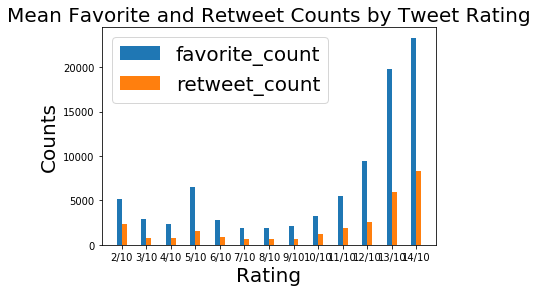

In [105]:

labels = x
fav_count = [fc1,fc2,fc3,fc4,fc5,fc6,fc7,fc8,fc9,fc10,fc11,fc12,fc13]
re_count = [rc1,rc2,rc3,rc4,rc5,rc6,rc7,rc8,rc9,rc10,rc11,rc12,rc13]

xx = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

figure(figsize=(20, 10), dpi=80)
fig, ax = plt.subplots()

rects1 = ax.bar(xx - width/2, fav_count, width, label='favorite_count')
rects2 = ax.bar(xx + width/2 , re_count, width, label='retweet_count')


ax.set_xticks(xx)
ax.set_xticklabels(labels)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts',fontsize=20)
ax.set_xlabel('Rating',fontsize=20)
ax.set_title('Mean Favorite and Retweet Counts by Tweet Rating',fontsize=20)
#ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 20})

plt.rcParams["figure.figsize"] = (30,10)


plt.show()
plt.rcParams["figure.figsize"] = (30,10)



These are the most frequent ratings on the WeRateDogs. We can see that with the rising numerator, also the number of tweets and retweets are rising. However there are some extremes with low ratings (<6).

The most favorite dog:

In [106]:
df1_clean[df1_clean['favorite_count']==df1_clean['favorite_count'].max()]

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf
672,744234799360020481,2016-06-18 18:26:18,None,13,10,https://twitter.com/dog_rates/status/744234799...,doggo,73286.0,148901.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333


The most retweeted dog:

In [107]:
df1_clean[df1_clean['retweet_count']==df1_clean['retweet_count'].max()]

,tweet_id,timestamp,name,rating_numerator,rating_denominator,expanded_urls,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf
672,744234799360020481,2016-06-18 18:26:18,None,13,10,https://twitter.com/dog_rates/status/744234799...,doggo,73286.0,148901.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333


The most liked dog is at the same time the most retweeted dog. It is Labrador retriever with the rating 13/10. Tweet contains video how he is swimming.

What breeds are most frequent?

In [108]:
df1_clean.p1.value_counts()[0:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [109]:
breeds=[]
for i in range(2,15):
    breeds.append(df1_clean.loc[((df1_clean['rating_numerator']== i) & (df1_clean['rating_denominator']==10)),'p1'].value_counts()[:1].index.tolist())

In [110]:
data={'rating':labels, 'most_common_breed':breeds}
df_breeds=pd.DataFrame(data)
df_breeds

,rating,most_common_breed
0,2/10,[Maltese_dog]
1,3/10,[Chihuahua]
2,4/10,[soft-coated_wheaten_terrier]
3,5/10,[golden_retriever]
4,6/10,[Airedale]
5,7/10,[Chihuahua]
6,8/10,[Italian_greyhound]
7,9/10,[pug]
8,10/10,[Labrador_retriever]
9,11/10,[golden_retriever]


### Insights

<ul>
    <li>The most common ratings have numerator 2-14 and denominator 10.</li>
    <li>I have identified mean favorite count and retweet count for the most common ratings. I found that both favorite counts and retweet counts are rising with ratings. For ratings 11/10 and higher mean favorite count is higher than 5000, and for 14/10 it is higher than 20000. The mean retweet count is hiher than 5000 for ratings 13/10 and 14/10. </li>
    <li> I identified also that very low ratings, particularly 2/10 and 5/10 have favorite count higher than 5000 and retweet_count arund 2000. </li>
    <li>I have identified that the tweet with the highest favorite count is as well as with the highest retweet count is the Labrador retriever (tweet_id=744234799360020481) with the rating 13/10. Tweet contains video how he is swimming and he is a doggo. </li>
    
<li>I have identified most common breeds for the most common ratings (2-14/10) and save these data in the dataframe df_breeds. </li>
<li>The most common breed of the whole dataset is the golden retriever.</li>
</ul>   

### Store data

In [242]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)
df2_clean.to_csv('twitter_image_predictions.csv', index=False)